In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# Import average motor (outputs and labels) and loss values
# for each data moment. When validating on
# networks trained for 6 epochs on direct vs.
# direct + follow data. Validation set is 
# only direct mode data.

directfollow = pd.read_csv('df.csv')
direct = pd.read_csv('d.csv')
print('Example of Direct Mode Trained Data')
print(direct.head(5))
print('Example of Direct + Follow Mode Trained Data')
print(directfollow.head(5))

Example of Direct Mode Trained Data
   Output Steer  Human Steer  Output Motor  Human Motor      Loss
0      0.567724     0.506995      0.558656     0.553650  0.002044
1      0.593679     0.522031      0.567659     0.545455  0.002892
2      0.588618     0.679564      0.584449     0.555556  0.006642
3      0.394144     0.450564      0.559043     0.592571  0.002773
4      0.143396     0.170694      0.565912     0.553868  0.000458
Example of Direct + Follow Mode Trained Data
   Output Steer  Human Steer  Output Motor  Human Motor      Loss
0      0.064290     0.099656      0.585710     0.597538  0.000721
1      0.791055     0.898238      0.565876     0.580196  0.005889
2      0.839735     0.888928      0.568727     0.545455  0.001495
3      0.261225     0.251944      0.597557     0.597222  0.000056
4      0.141044     0.015043      0.551876     0.555556  0.007951


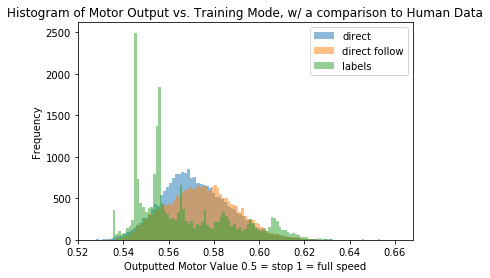

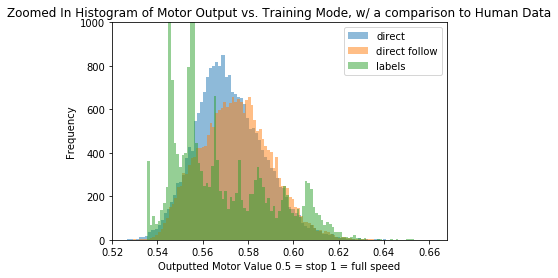

In [9]:
# Find histograms of motor outputs of the network
bins = 100

plt.hist(direct['Output Motor'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output Motor'], bins, alpha=0.5, label='direct follow')
plt.hist(direct['Human Motor'], bins, alpha=0.5, label='labels')
plt.title('Histogram of Motor Output vs. Training Mode, w/ a comparison to Human Data')
plt.xlabel('Outputted Motor Value 0.5 = stop 1 = full speed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(direct['Output Motor'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output Motor'], bins, alpha=0.5, label='direct follow')
plt.hist(direct['Human Motor'], bins, alpha=0.5, label='labels')
plt.title('Zoomed In Histogram of Motor Output vs. Training Mode, w/ a comparison to Human Data')
plt.xlabel('Outputted Motor Value 0.5 = stop 1 = full speed')
plt.ylabel('Frequency')
plt.ylim(0,1000)
plt.legend()
plt.show()

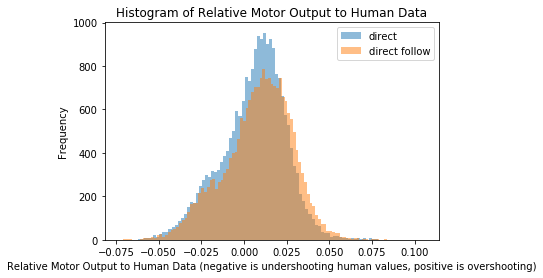

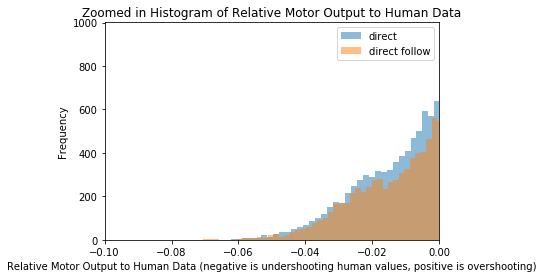

In [10]:
# Find histogram of relative output to human data
# Find undershooting/overshooting
# Find histograms of outputs of the network
bins = 100

plt.hist(direct['Output Motor'] - direct['Human Motor'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output Motor'] - directfollow['Human Motor'], bins, alpha=0.5, label='direct follow')
plt.title('Histogram of Relative Motor Output to Human Data')
plt.xlabel('Relative Motor Output to Human Data (negative is undershooting human values, positive is overshooting)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Let's just look at undershooting
plt.title('Zoomed in Histogram of Relative Motor Output to Human Data')
plt.xlabel('Relative Motor Output to Human Data (negative is undershooting human values, positive is overshooting)')
plt.ylabel('Frequency')
plt.xlim(-0.1,0)
plt.hist(direct['Output Motor'] - direct['Human Motor'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output Motor'] - directfollow['Human Motor'], bins, alpha=0.5, label='direct follow')
plt.legend()
plt.show()

0.00674639724019


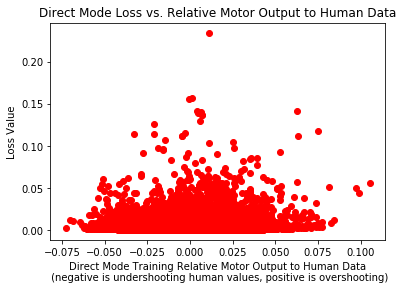

0.0762487439674


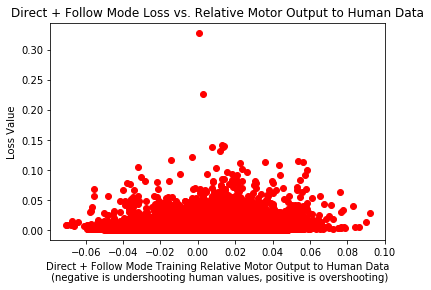

In [11]:
# Is the over or undershooting related to loss?
# Calculate correlation constant to see
# Is the speed a "confidence metric" of the network?

plt.plot(direct['Output Motor'] - direct['Human Motor'], direct['Loss'], 'ro')
plt.xlabel('Direct Mode Training Relative Motor Output to Human Data\n (negative is undershooting human values, positive is overshooting)')
plt.ylabel('Loss Value')
plt.title('Direct Mode Loss vs. Relative Motor Output to Human Data')
print(stats.linregress(direct['Output Motor'] - direct['Human Motor'], direct['Loss']).rvalue)
plt.show()

plt.plot(directfollow['Output Motor'] - directfollow['Human Motor'], directfollow['Loss'], 'ro')
plt.xlabel('Direct + Follow Mode Training Relative Motor Output to Human Data\n (negative is undershooting human values, positive is overshooting)')
plt.ylabel('Loss Value')
plt.title('Direct + Follow Mode Loss vs. Relative Motor Output to Human Data')
print(stats.linregress(directfollow['Output Motor'] - directfollow['Human Motor'], directfollow['Loss']).rvalue)
plt.show()

0.0852012878235


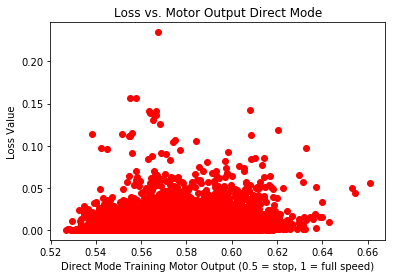

0.129790873632


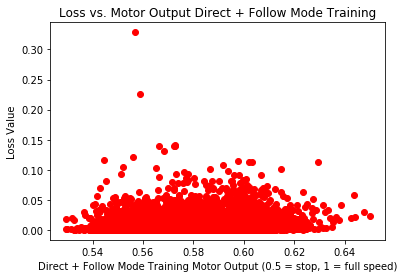

In [13]:
# Same experiment with exact motor vals rather than relative to labels

plt.plot(direct['Output'], direct['Loss'], 'ro')
print(stats.linregress(direct['Output'], direct['Loss']).rvalue)
plt.title('Loss vs. Motor Output Direct Mode')
plt.xlabel('Direct Mode Training Motor Output (0.5 = stop, 1 = full speed)')
plt.ylabel('Loss Value')
plt.show()

plt.plot(directfollow['Output'], directfollow['Loss'], 'ro')
print(stats.linregress(directfollow['Output'], directfollow['Loss']).rvalue)
plt.title('Loss vs. Motor Output Direct + Follow Mode Training')
plt.xlabel('Direct + Follow Mode Training Motor Output (0.5 = stop, 1 = full speed)')
plt.ylabel('Loss Value')
plt.show()

-0.294020700029


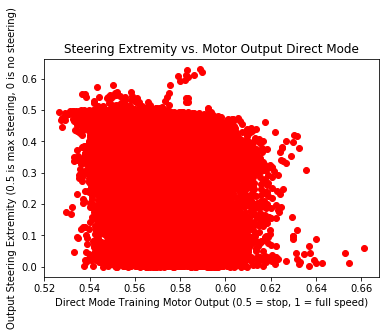

-0.290521597924


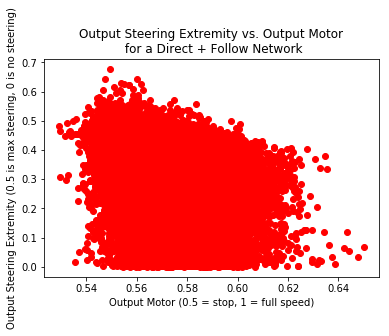

-0.18254181898


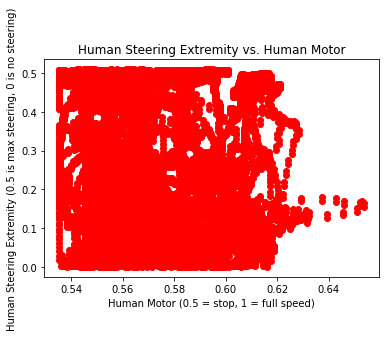

In [32]:
# Calculate correlation between extremity of steering result and 
# motor value magnitude. Steering values are scaled to -0.5 to 0.5
# and are then abs() to get the magnitude of steering.

plt.plot(direct['Output Motor'], (direct['Output Steer'] - 0.5).abs(), 'ro')
print(stats.linregress(direct['Output Motor'], (direct['Output Steer'] - 0.5).abs()).rvalue)
plt.title('Steering Extremity vs. Motor Output Direct Mode')
plt.xlabel('Direct Mode Training Motor Output (0.5 = stop, 1 = full speed)')
plt.ylabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.plot(directfollow['Output Motor'], (directfollow['Output Steer']- 0.5).abs(), 'ro')
print(stats.linregress(directfollow['Output Motor'], (directfollow['Output Steer']- 0.5).abs()).rvalue)
plt.title('Output Steering Extremity vs. Output Motor\n for a Direct + Follow Network')
plt.xlabel('Output Motor (0.5 = stop, 1 = full speed)')
plt.ylabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.plot(direct['Human Motor'], (direct['Human Steer']- 0.5).abs(), 'ro')
print(stats.linregress(direct['Human Motor'], (direct['Human Steer']- 0.5).abs()).rvalue)
plt.title('Human Steering Extremity vs. Human Motor')
plt.xlabel('Human Motor (0.5 = stop, 1 = full speed)')
plt.ylabel('Human Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

### Negative Correlation between Extremity of Steering and Speed
This results above are importaint, it shows that as the car is turning (or as it has to make a complex decision), the network slows down. This is interesting because the behavior is not seen within the dataset itself, this is an emergent behavior. The R = -0.3 means there is a [weak correlation between these factors](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/). More research should be done on what factors increase this relationship (# of epochs of training etc.)

-0.294020700029


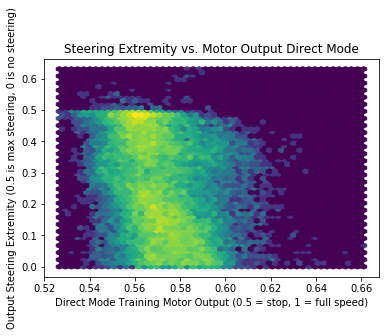

-0.290521597924


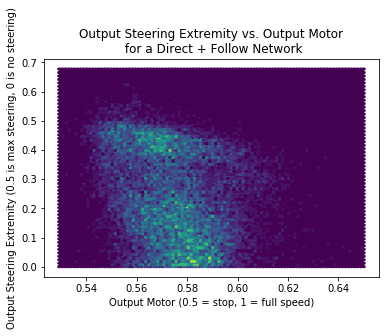

-0.18254181898


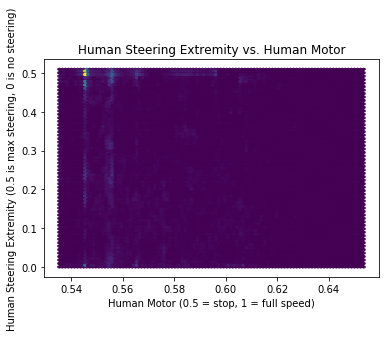

In [40]:
# Calculate correlation between extremity of steering result and 
# motor value magnitude. Steering values are scaled to -0.5 to 0.5
# and are then abs() to get the magnitude of steering.

plt.hexbin(direct['Output Motor'], (direct['Output Steer'] - 0.5).abs(), gridsize=50, bins='log')
print(stats.linregress(direct['Output Motor'], (direct['Output Steer'] - 0.5).abs()).rvalue)
plt.title('Steering Extremity vs. Motor Output Direct Mode')
plt.xlabel('Direct Mode Training Motor Output (0.5 = stop, 1 = full speed)')
plt.ylabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.hexbin(directfollow['Output Motor'], (directfollow['Output Steer']- 0.5).abs())
print(stats.linregress(directfollow['Output Motor'], (directfollow['Output Steer']- 0.5).abs()).rvalue)
plt.title('Output Steering Extremity vs. Output Motor\n for a Direct + Follow Network')
plt.xlabel('Output Motor (0.5 = stop, 1 = full speed)')
plt.ylabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.hexbin(direct['Human Motor'], (direct['Human Steer']- 0.5).abs(), grids)
print(stats.linregress(direct['Human Motor'], (direct['Human Steer']- 0.5).abs()).rvalue)
plt.title('Human Steering Extremity vs. Human Motor')
plt.xlabel('Human Motor (0.5 = stop, 1 = full speed)')
plt.ylabel('Human Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()